<a href="https://colab.research.google.com/github/lazy-wolf/TME_6017/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 19-02-2024
# Email: wasim.sk@unb.ca
```

**Import Libraries**

In [1]:
# Importing necessary libraries for data handling, transformation, and visualization
import torch
from torchvision.datasets import OxfordIIITPet
from torch.utils.data import Subset
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

**2. Data Collection and Preprocessing**

In [2]:
# Loading the OxfordIIITPet dataset with segmentation masks, downloading it if not locally available
dataset = OxfordIIITPet(root='./data', target_types="segmentation", download = True)

100%|██████████| 791918971/791918971 [00:34<00:00, 22781329.92it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 11363983.48it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


In [3]:
#Dataset
dataset

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: ./data

**Dataset**

In [4]:
# Generating random indices to sample 8 images from the dataset
indices = torch.randint(0,len(dataset),size=(8,))
# Creating a subset of the dataset based on the generated indices
dataset = Subset(dataset,indices)

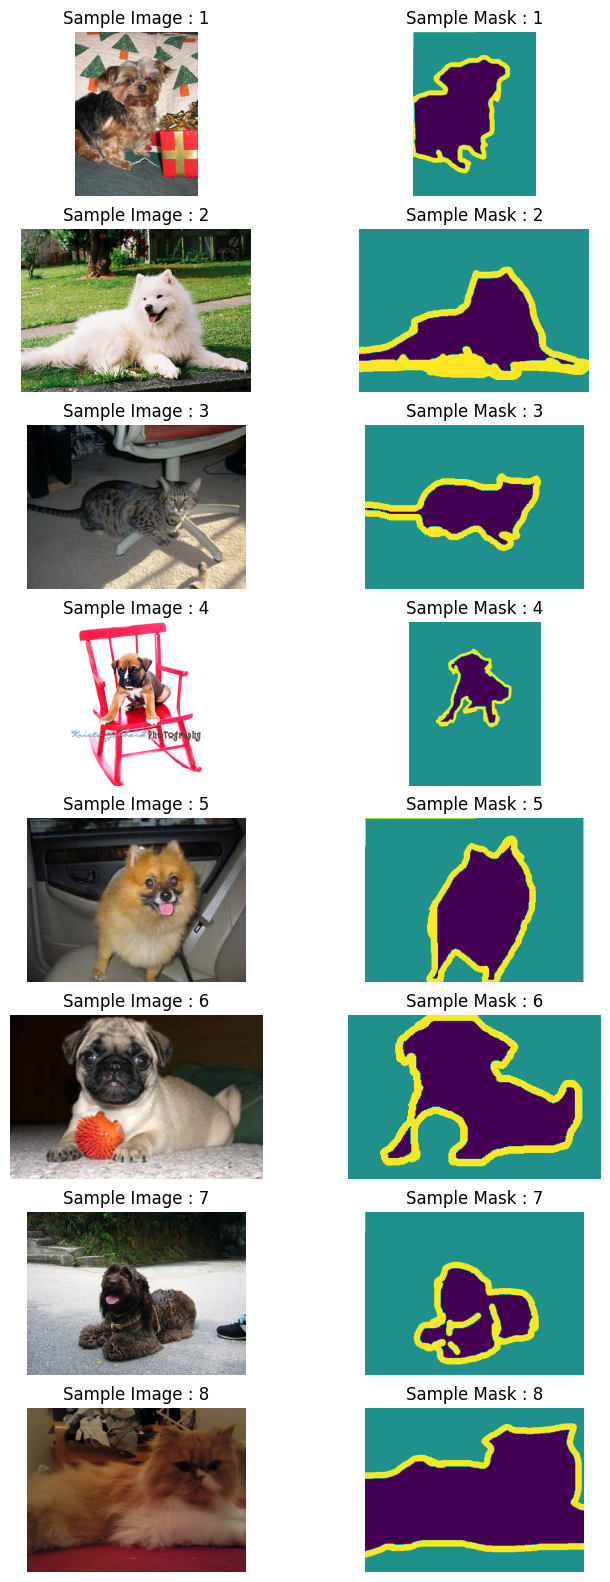

In [5]:
# Setting up a figure to display the sampled images and their masks
fig  = plt.figure(figsize=(8,20))
for i in range(8):
    # Extracting image and corresponding mask from the dataset
    image_sample,mask_sample = dataset[i][0],dataset[i][1]
    # Adding subplots to the figure for the image
    fig.add_subplot(8,2,i*2+1)
    plt.imshow(image_sample)
    plt.title(f"Sample Image : {i+1}")
    plt.axis("off")

    # Adding subplots to the figure for the mask
    fig.add_subplot(8,2,i*2+2)
    plt.imshow(mask_sample)
    plt.title(f"Sample Mask : {i+1}")
    plt.axis("off")

plt.show()

**Preprocessing**

In [6]:
# Defining transformations for preprocessing the images before passing to the model
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256,256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

**3. Implementation**

**Segmentation Implementation**

In [7]:
# Loading a pretrained DeepLabV3 model with a ResNet50 backbone
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 130MB/s]


In [8]:
# Switching the model to evaluation mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [9]:
# Setting up a color palette for visualizing the segmentation output
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

**4. Analysis and Discussion**

**Insights**

**Result where Image preprocessing was done**

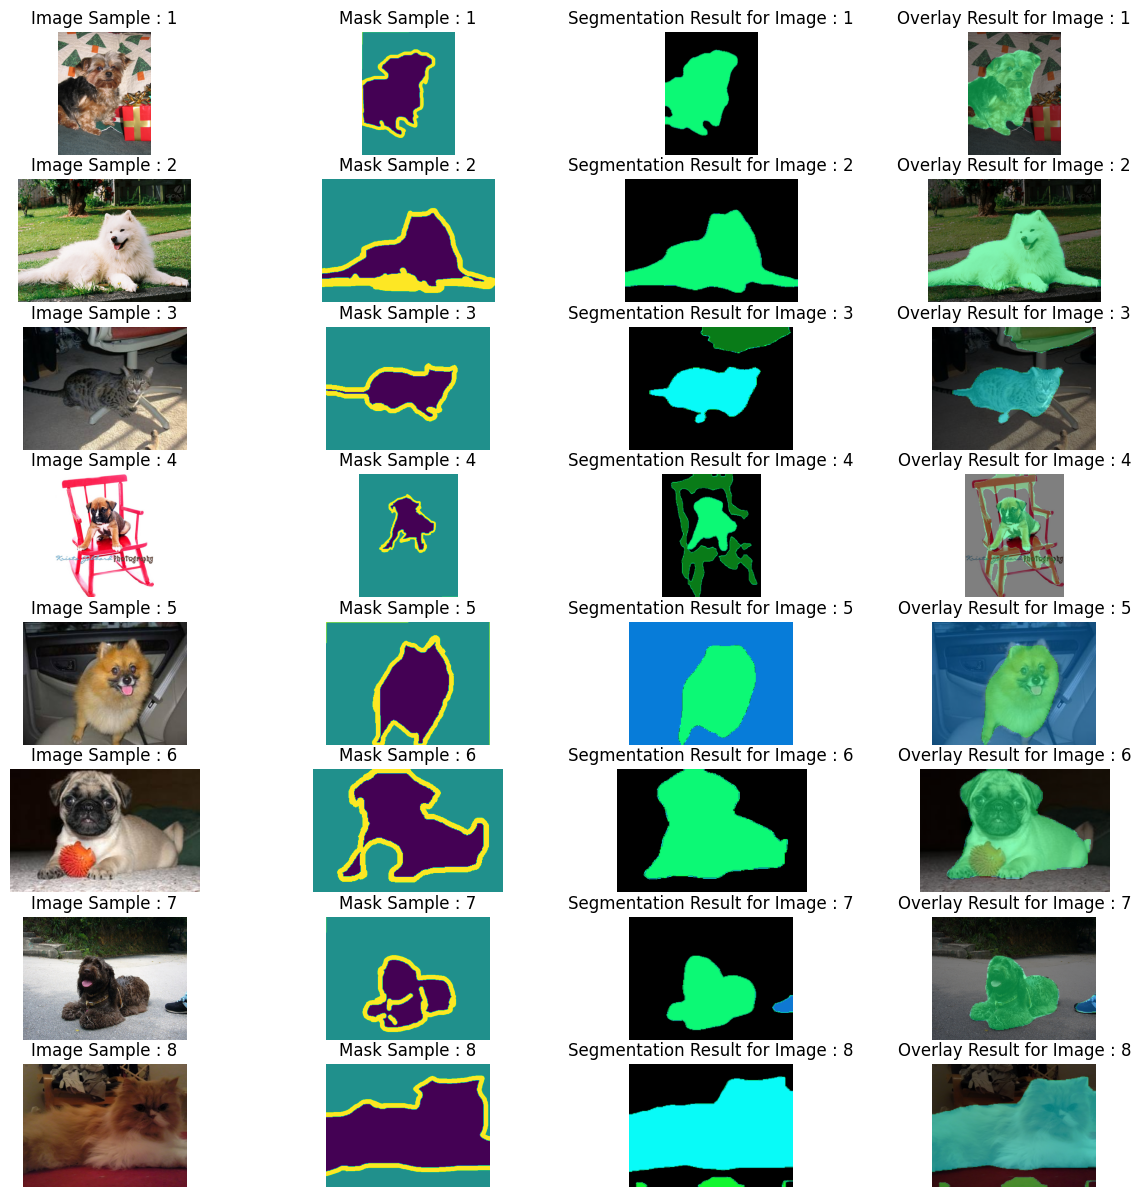

In [10]:
# Setting up another figure to display the processed outputs
fig  = plt.figure(figsize=(15,15))
for i in range(8):
    # Extracting image and corresponding mask from the dataset
    image_sample,mask_sample = dataset[i][0],dataset[i][1]

    # Display original image
    fig.add_subplot(8,4,i*4+1)
    plt.imshow(image_sample)
    plt.title(f"Image Sample : {i+1}")
    plt.axis("off")

    # Display original mask
    fig.add_subplot(8,4,i*4+2)
    plt.imshow(mask_sample)
    plt.title(f"Mask Sample : {i+1}")
    plt.axis("off")

    # Preprocess the image and prepare it for the model
    input_tensor = preprocess((image_sample))
    input_batch = input_tensor.unsqueeze(0)
    # Checking if GPU is available and transferring data to GPU if it is
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    # Passing data through the model without calculating gradients
    with torch.no_grad():
        output = model(input_batch)['out'][0]
    # Getting the highest probability predictions from the output
    output_predictions = output.argmax(0)
    # Converting the predictions to an image format
    final_image = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(image_sample.size)
    #Adding color palette to different classes
    final_image.putpalette(colors)

    # Display segmented result
    fig.add_subplot(8,4,i*4+3)
    plt.imshow(final_image)
    plt.title(f"Segmentation Result for Image : {i+1}")
    plt.axis("off")

    #Display Image Overlay result
    fig.add_subplot(8,4,i*4+4)
    alpha_image = image_sample.copy()
    alpha_image.putalpha(255)
    final_image = final_image.convert("RGBA")
    final_image.putalpha(128)
    plt.imshow(Image.alpha_composite(alpha_image, final_image))
    plt.title(f"Overlay Result for Image : {i+1}")
    plt.axis("off")

plt.show()

**Result where Image preprocessing was not done**

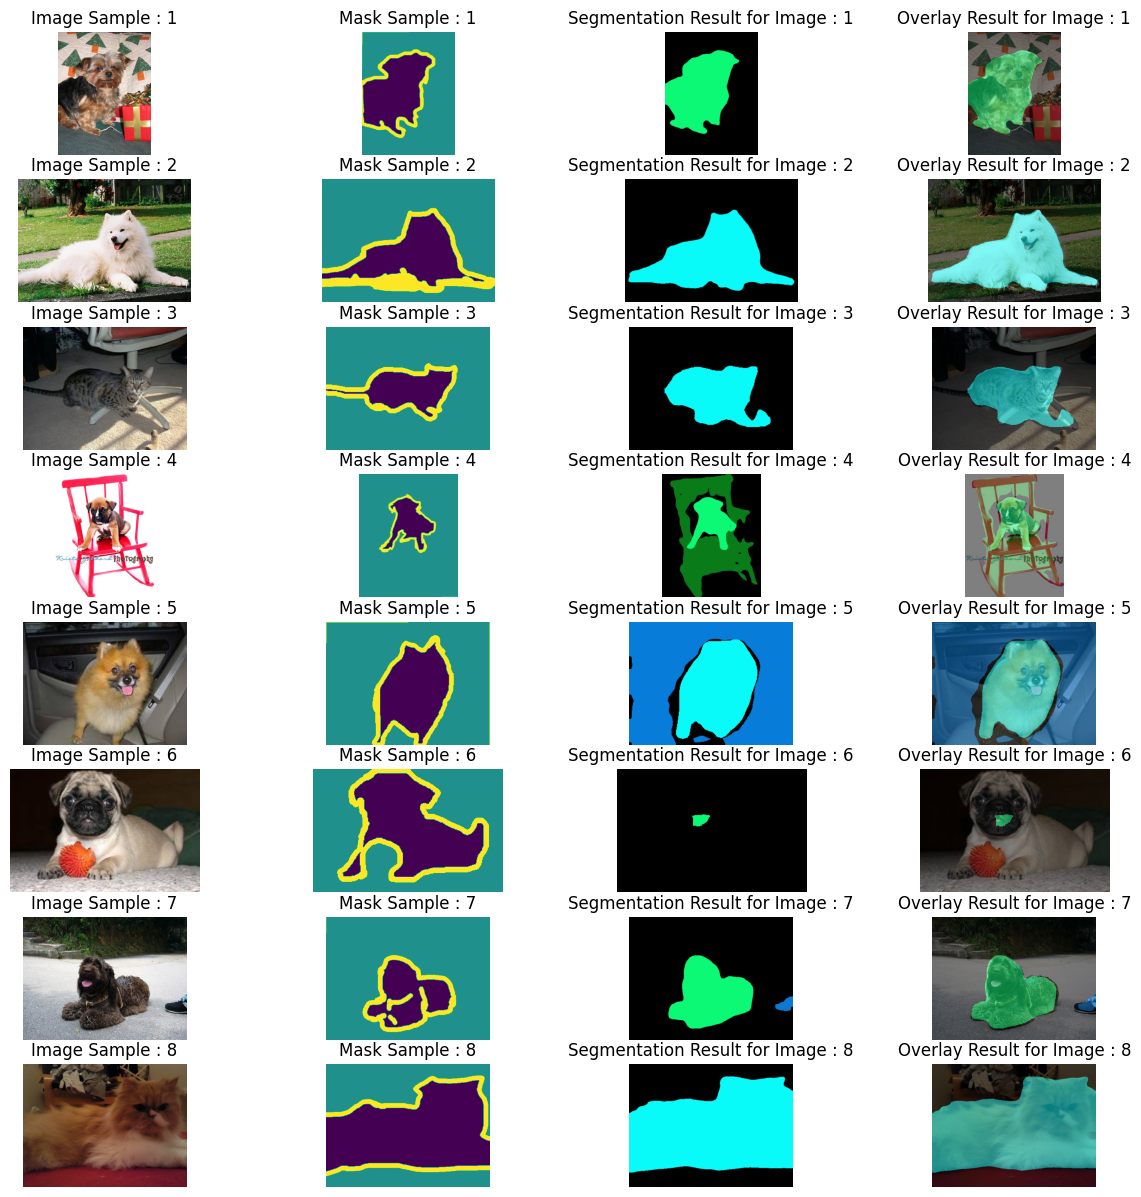

In [11]:
# Setting up another figure to display the processed outputs
fig  = plt.figure(figsize=(15,15))
for i in range(8):
    # Extracting image and corresponding mask from the dataset
    image_sample,mask_sample = dataset[i][0],dataset[i][1]

    # Display original image
    fig.add_subplot(8,4,i*4+1)
    plt.imshow(image_sample)
    plt.title(f"Image Sample : {i+1}")
    plt.axis("off")

    # Display original mask
    fig.add_subplot(8,4,i*4+2)
    plt.imshow(mask_sample)
    plt.title(f"Mask Sample : {i+1}")
    plt.axis("off")

    # Preprocess the image and prepare it for the model
    #Sending the image to the model without preprocessing
    input_tensor = transforms.ToTensor()(image_sample)
    input_batch = input_tensor.unsqueeze(0)
    # Checking if GPU is available and transferring data to GPU if it is
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    # Passing data through the model without calculating gradients
    with torch.no_grad():
        output = model(input_batch)['out'][0]
    # Getting the highest probability predictions from the output
    output_predictions = output.argmax(0)
    # Converting the predictions to an image format
    final_image = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(image_sample.size)
    #Adding color palette to different classes
    final_image.putpalette(colors)

    # Display segmented result
    fig.add_subplot(8,4,i*4+3)
    plt.imshow(final_image)
    plt.title(f"Segmentation Result for Image : {i+1}")
    plt.axis("off")

    #Display Image Overlay result
    fig.add_subplot(8,4,i*4+4)
    alpha_image = image_sample.copy()
    alpha_image.putalpha(255)
    final_image = final_image.convert("RGBA")
    final_image.putalpha(128)
    plt.imshow(Image.alpha_composite(alpha_image, final_image))
    plt.title(f"Overlay Result for Image : {i+1}")
    plt.axis("off")

plt.show()